# 데이터셋 확인

## 불필요한 컬럼 및 영어 아닌 값들 제거

In [ ]:
import pandas as pd

df1 = pd.read_csv('dataset/Genius Song Lyrics.csv')

In [ ]:
print('df1 columns :', df1.columns)

df1 columns : Index(['title', 'tag', 'artist', 'year', 'views', 'features', 'lyrics', 'id',
       'language_cld3', 'language_ft', 'language'],
      dtype='object')


In [ ]:
df1[:5]

,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1,en,en,en
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3,en,en,en
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4,en,en,en
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5,en,en,en
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6,en,en,en


In [ ]:
# 영어노래만 남기기
df1 = df1[df1['language'] == 'en']
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374198 entries, 0 to 5134855
Data columns (total 11 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   title          object
 1   tag            object
 2   artist         object
 3   year           int64 
 4   views          int64 
 5   features       object
 6   lyrics         object
 7   id             int64 
 8   language_cld3  object
 9   language_ft    object
 10  language       object
dtypes: int64(3), object(8)
memory usage: 308.9+ MB


In [ ]:
df1 = df1.drop(columns=['language_cld3', 'language_ft', 'language', 'id', 'features'])

In [ ]:
print('df1 columns :', df1.columns)

df1 columns : Index(['title', 'tag', 'artist', 'year', 'views', 'lyrics'], dtype='object')


In [ ]:
df1 = df1.rename(columns={'tag':'genre'})

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374198 entries, 0 to 5134855
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   title   object
 1   genre   object
 2   artist  object
 3   year    int64 
 4   views   int64 
 5   lyrics  object
dtypes: int64(2), object(4)
memory usage: 180.2+ MB


In [ ]:
# 가사 없는 값들 제거
df1 = df1.dropna(subset=['lyrics'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3374198 entries, 0 to 5134855
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   title   object
 1   genre   object
 2   artist  object
 3   year    int64 
 4   views   int64 
 5   lyrics  object
dtypes: int64(2), object(4)
memory usage: 180.2+ MB


In [ ]:
# 인덱스 리셋
df1 = df1.reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3374198 entries, 0 to 3374197
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   title   object
 1   genre   object
 2   artist  object
 3   year    int64 
 4   views   int64 
 5   lyrics  object
dtypes: int64(2), object(4)
memory usage: 154.5+ MB


In [ ]:
# 10,000만 저장해서 확인
df_sample = df1.sample(n=10000, random_state=2025)  
df_sample.to_csv("data/sample_dataset.csv", index=False)

## 샘플에서 확인하며 전처리 하기

In [14]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("data/sample_dataset.csv")

# 데이터 개요
num_rows, num_cols = df.shape
columns = df.columns.tolist()

# 장르별 곡 수
genre_counts = df["genre"].value_counts()

# 아티스트별 곡 수
artist_counts = df["artist"].value_counts()
num_artists = artist_counts.shape[0]
top_artists = artist_counts.head(10)

# 연도별 곡 수
year_counts = df["year"].value_counts().sort_index()

# 연도 값 확인 (이상값이 있는지 보기 위해 정렬된 리스트 출력)
unique_years = sorted(df["year"].dropna().unique())

# 결과 출력
print(f"총 데이터 개수: {num_rows}")
print(f"총 컬럼 개수: {num_cols}")
print(f"컬럼 목록: {columns}")
print("\n장르별 곡 수:")
print(genre_counts)
print(f"\n아티스트 수: {num_artists}")
print("\n상위 10명의 아티스트별 곡 수:")
print(top_artists)
print("\n연도별 곡 수:")
print(year_counts)
print("\n연도 값 샘플 (이상값 확인용):")
print(unique_years[:20])  # 일부만 출력해서 확인


총 데이터 개수: 10000
총 컬럼 개수: 6
컬럼 목록: ['title', 'genre', 'artist', 'year', 'views', 'lyrics']

장르별 곡 수:
genre
pop        4145
rap        2887
rock       1863
rb          437
misc        409
country     259
Name: count, dtype: int64

아티스트 수: 9072

상위 10명의 아티스트별 곡 수:
artist
Genius English Translations    41
Guided by Voices                9
Holy Bible (KJV)                7
The Grateful Dead               7
George Jones                    6
Conway Twitty                   5
Kylie Minogue                   5
Mark Twain                      5
Stephen Sondheim                4
Charles Dickens                 4
Name: count, dtype: int64

연도별 곡 수:
year
1          1
13         1
397        1
1517       2
1563       1
        ... 
2019     915
2020    1086
2021     856
2022     214
2024       1
Name: count, Length: 119, dtype: int64

연도 값 샘플 (이상값 확인용):
[1, 13, 397, 1517, 1563, 1751, 1790, 1796, 1808, 1812, 1815, 1819, 1822, 1823, 1837, 1841, 1842, 1843, 1844, 1847]


In [5]:
import pandas as pd
import re

# 데이터 불러오기
df = pd.read_csv("data/sample_dataset.csv")

# Genius English Translations 필터링
mask = df['artist'] == 'Genius English Translations'

# 아티스트 이름 추출 (제목에서 ' - ' 앞부분)
extracted_artists = df.loc[mask, 'title'].str.split(' - ').str[0].str.strip()

# 제목 수정: 추출한 아티스트 이름과 ' - ', 'English Translation' 제거
titles_cleaned = df.loc[mask, 'title'].str.replace(r'^.*? - ', '', regex=True) \
                                      .str.replace(r'\(English Translation\)', '', regex=True) \
                                      .str.replace('English Translation', '', regex=False) \
                                      .str.strip()

# 수정 적용
df.loc[mask, 'artist'] = extracted_artists
df.loc[mask, 'title'] = titles_cleaned

# 가사 전처리
df['lyrics'] = df['lyrics'].str.replace(r'\[.*?\]', '', regex=True)  # 대괄호 안 제거
df['lyrics'] = df['lyrics'].str.replace('\n', ' ', regex=False)     # 줄바꿈 제거

# 결과 확인
print(df.loc[mask, ['artist', 'title', 'lyrics']].head())


          artist                 title  \
506          BoA           Got Me Good   
518    P1Harmony       Do It Like This   
752     Calcutta  Sorriso Milano Dateo   
884         Arca               Desafío   
1268  Angela Aki           Silent Girl   

                                                 lyrics  
506   Begun unexpectedly Never-ending game Caught in...  
518    Yo Do it, do it, do it, do it, do it like thi...  
752   Milano Dateo tiny spot on the map But I'm goin...  
884    Touch me for the first time Kill me again and...  
1268   Silent girl What are you trying to say tonigh...  


In [8]:
import langdetect

# 영어만 남기기 위한 함수
def is_english(text):
    try:
        return langdetect.detect(text) == 'en'
    except:
        return False

# 영어 가사만 남기기
df = df[df['lyrics'].apply(is_english)].reset_index(drop=True)

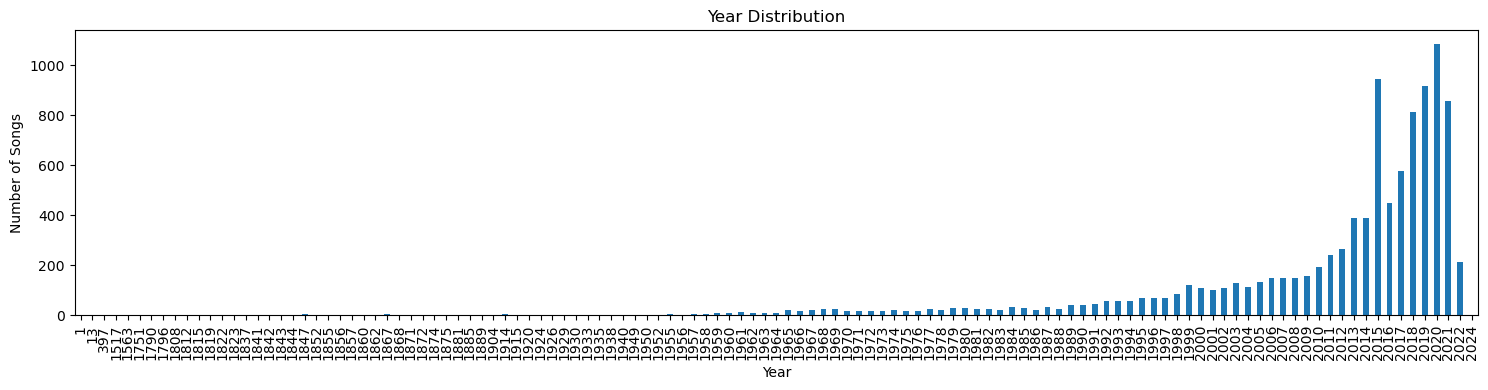

In [ ]:
import matplotlib.pyplot as plt

# 연도 분포 시각화
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 4))
plt.title("Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

In [ ]:
# 연도범위를 1980년부터 2024년으로 축소
df = df[(df['year'] >= 1980) & (df['year'] <= 2024)].reset_index(drop=True)

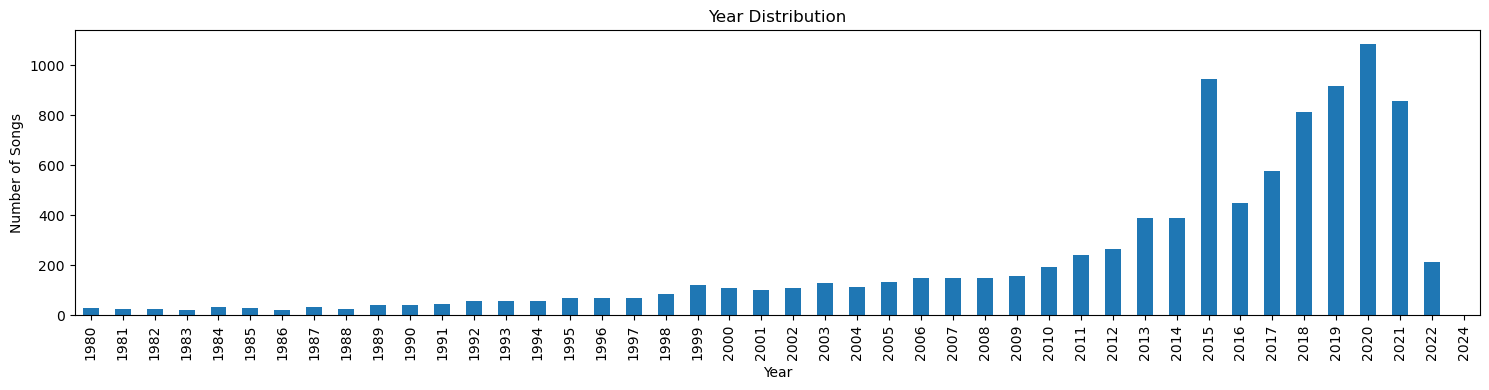

In [11]:
# 연도 분포 시각화
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 4))
plt.title("Year Distribution")
plt.xlabel("Year")
plt.ylabel("Number of Songs")
plt.tight_layout()
plt.show()

# 전처리 과정 함수화 후 원본 데이터셋에 적용

## 샘플을 뽑아 해보기

In [84]:
import pandas as pd
import importlib; import preprocessing; importlib.reload(preprocessing)
from preprocessing import preprocess_genius_dataset, preprocess_top100_dataset

# Genius Dataset
genius = pd.read_csv("../dataset/Genius Song Lyrics.csv")
genius_sample = genius.sample(n=3000, random_state=43).reset_index(drop=True)
genius_cleaned = preprocess_genius_dataset(genius_sample)
genius_cleaned.to_csv("../data/genius_cleaned_sample.csv", index=False)

# Top 100 Dataset
top100 = pd.read_csv("../dataset/Top 100 Songs & Lyrics By Year 1959 - 2023 (USA).csv")
top100_sample = top100.sample(n=3000, random_state=43).reset_index(drop=True)
top100_cleaned = preprocess_top100_dataset(top100_sample)
top100_cleaned.to_csv("../data/top100_cleaned_sample.csv", index=False)

1. 영어 가사 필터링 중...
2. 제목 및 아티스트 정리 중...
3. 컬럼 이름 및 순서 정리 중...
4. 연도 및 가사 정제 중...
5. 형태소 분석 및 불용어 제거 중...
전처리 완료.
1. 컬럼 이름 및 순서 정리 중...
2. 연도 및 가사 정제 중...
3. 형태소 분석 및 불용어 제거 중...
전처리 완료.


In [85]:
genius_cleaned.head()

,title,artist,genre,year,lyrics,lyrics_tokens
0,Stolen Horses,Guy Smith,country,2020,i'm ridin' stolen horses runnin' through the n...,"[ridin, ', stolen, horses, runnin, ', night, g..."
1,Nates Song,Lashes,pop,2006,well the last time i said i love you i really ...,"[well, last, time, said, love, really, mean, r..."
2,Biomorph II: Collide into Being,Sunless Dawn,rock,2018,just a whisper i could hear it now lost in a s...,"[whisper, could, hear, lost, sea, information,..."
3,Taken Off The List,Grenouer,pop,2008,looking into sun making things you've done to ...,"[looking, sun, making, things, done, lying, sa..."
4,A Dogs Breakfast,Tourniquet,rock,1991,listen to ron hubbard's son dad was conman num...,"[listen, ron, hubbard, son, dad, conman, numbe..."


In [86]:
top100_cleaned.head()

,title,artist,release date,year,rank,lyrics,lyrics_tokens
0,I Can't Help Myself (Sugar Pie Honey Bunch),Four Tops,1965-11-13,1965,2,uuh sugar pie honey bunch you know that i love...,"[sugar, pie, honey, bunch, know, love, ca, hel..."
1,Little Ole Man (Uptight-Everything's Alright),Bill Cosby,NaN,1967,92,verse a little ole' man was sittin' on a step ...,"[verse, little, ole, ', man, sittin, ', step, ..."
2,How Do You Do It!,Gerry and The Pacemakers,NaN,1964,89,how do you do what you do to me i wish i knew ...,"[wish, knew, knew, feelin, ', blue, wish, knew..."
3,Stir It Up,Johnny Nash,1972-03-31,1973,91,stir it up bob marley stir it up little darlin...,"[stir, bob, marley, stir, little, darling, sti..."
4,Self Control,Laura Branigan,1984-04-19,1984,20,oh the night is my world city light painted gi...,"[night, world, city, light, painted, girl, day..."


## 원본 데이터셋에 적용용

In [ ]:
import pandas as pd
from preprocessing import preprocess_genius_dataset, preprocess_top100_dataset

# Genius 원본 데이터 불러오기
genius_df = pd.read_csv("../dataset/Genius Song Lyrics.csv")
genius_cleaned = preprocess_genius_dataset(genius_df)
genius_cleaned.to_csv("../data/genius_cleaned.csv", index=False)

# Top 100 원본 데이터 불러오기
top100_df = pd.read_csv("../dataset/Top 100 Songs & Lyrics By Year 1959 - 2023 (USA).csv")
top100_cleaned = preprocess_top100_dataset(top100_df)
top100_cleaned.to_csv("../data/top100_cleaned.csv", index=False)